In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tweets = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")

In [4]:
tweets.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
tweets.isna().sum()

review       0
sentiment    0
dtype: int64

In [6]:
tweets['review'].duplicated().sum()

418

In [7]:
tweets.drop_duplicates(inplace = True)

In [8]:
len(tweets)

49582

In [9]:
tweets['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [10]:
tweets['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

In [11]:
tweets['sentiment'] = tweets['sentiment'].replace({'negative':0, 'positive':1})

In [12]:
tweets.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


##**Cleaning and Analysis on Positive Tweets** 

In [13]:
df_positive = tweets[tweets['sentiment']==1]

In [14]:
df_positive

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
...,...,...
49983,"I loved it, having been a fan of the original ...",1
49985,Imaginary Heroes is clearly the best film of t...,1
49989,I got this one a few weeks ago and love it! It...,1
49992,John Garfield plays a Marine who is blinded by...,1


In [15]:
x_positive = df_positive['review']
y_positive = df_positive['sentiment']

In [16]:
x_positive

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
4        Petter Mattei's "Love in the Time of Money" is...
5        Probably my all-time favorite movie, a story o...
                               ...                        
49983    I loved it, having been a fan of the original ...
49985    Imaginary Heroes is clearly the best film of t...
49989    I got this one a few weeks ago and love it! It...
49992    John Garfield plays a Marine who is blinded by...
49995    I thought this movie did a down right good job...
Name: review, Length: 24884, dtype: object

In [17]:
y_positive

0        1
1        1
2        1
4        1
5        1
        ..
49983    1
49985    1
49989    1
49992    1
49995    1
Name: sentiment, Length: 24884, dtype: int64

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

In [20]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
len(stop_words)

179

In [22]:
import re
def clean_text(texts):

  clean_review = []

  for i in range(len(texts)):

      review = re.sub('[^a-zA-Z]', ' ', texts.iloc[i])

      review = review.lower().split()

      review = [stemmer.stem(word) for word in review if not word in stop_words]

      review = " ". join(review)

      clean_review.append(review)

  return clean_review    

In [23]:
positive_tweets = clean_text(x_positive)

In [24]:
positive_tweets

['one review mention watch oz episod hook right exact happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus main emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darke

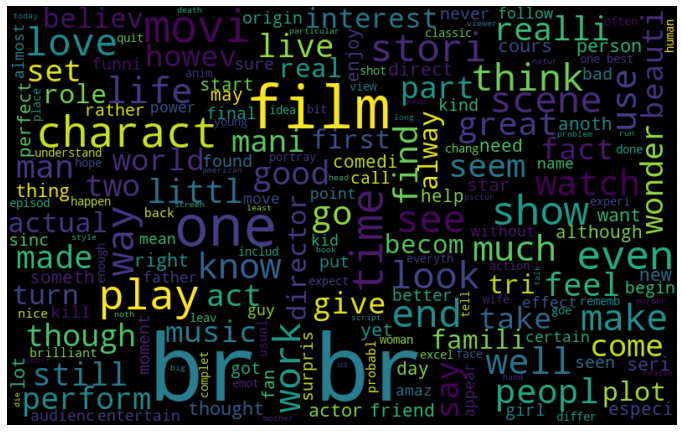

In [25]:
all_words = ' '.join([text for text in positive_tweets]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(12, 8)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [26]:
from collections import Counter

In [27]:
positive_words = Counter()

for i in range(len(positive_tweets)):
  for word in positive_tweets[i].split():
    positive_words[word]+=1

positive_words.most_common()    

[('br', 97604),
 ('film', 50734),
 ('movi', 44639),
 ('one', 28176),
 ('like', 20484),
 ('time', 16564),
 ('good', 15207),
 ('see', 15083),
 ('stori', 14151),
 ('charact', 13967),
 ('make', 13761),
 ('great', 13263),
 ('well', 13031),
 ('watch', 12838),
 ('get', 12643),
 ('love', 12475),
 ('show', 11022),
 ('also', 10761),
 ('realli', 10707),
 ('would', 10547),
 ('play', 10027),
 ('scene', 10023),
 ('even', 9884),
 ('first', 9249),
 ('end', 9242),
 ('much', 9176),
 ('way', 8829),
 ('peopl', 8799),
 ('best', 8492),
 ('think', 8444),
 ('go', 8308),
 ('look', 8145),
 ('life', 8116),
 ('year', 7807),
 ('mani', 7643),
 ('work', 7608),
 ('made', 7297),
 ('know', 7239),
 ('two', 7133),
 ('perform', 7033),
 ('thing', 7005),
 ('act', 6883),
 ('take', 6829),
 ('man', 6804),
 ('seen', 6723),
 ('come', 6698),
 ('say', 6630),
 ('seem', 6490),
 ('still', 6444),
 ('littl', 6431),
 ('never', 6312),
 ('actor', 6298),
 ('could', 6236),
 ('find', 5976),
 ('want', 5963),
 ('give', 5808),
 ('feel', 5673),


In [28]:
positive_words

Counter({'one': 28176,
         'review': 1752,
         'mention': 1303,
         'watch': 12838,
         'oz': 210,
         'episod': 3135,
         'hook': 371,
         'right': 3635,
         'exact': 1088,
         'happen': 3185,
         'br': 97604,
         'first': 9249,
         'thing': 7005,
         'struck': 172,
         'brutal': 594,
         'unflinch': 35,
         'scene': 10023,
         'violenc': 1047,
         'set': 4260,
         'word': 1735,
         'go': 8308,
         'trust': 387,
         'show': 11022,
         'faint': 73,
         'heart': 2248,
         'timid': 37,
         'pull': 959,
         'punch': 271,
         'regard': 537,
         'drug': 917,
         'sex': 1359,
         'hardcor': 104,
         'classic': 2794,
         'use': 4923,
         'call': 2425,
         'nicknam': 49,
         'given': 1649,
         'oswald': 25,
         'maximum': 47,
         'secur': 214,
         'state': 1107,
         'penitentari': 2,
        

In [29]:
freq_df_positive = pd.DataFrame(list(positive_words.items()))
freq_df_positive.columns = ['hashtags', 'count']
top_20_positive = freq_df_positive.nlargest(columns='count', n=20)

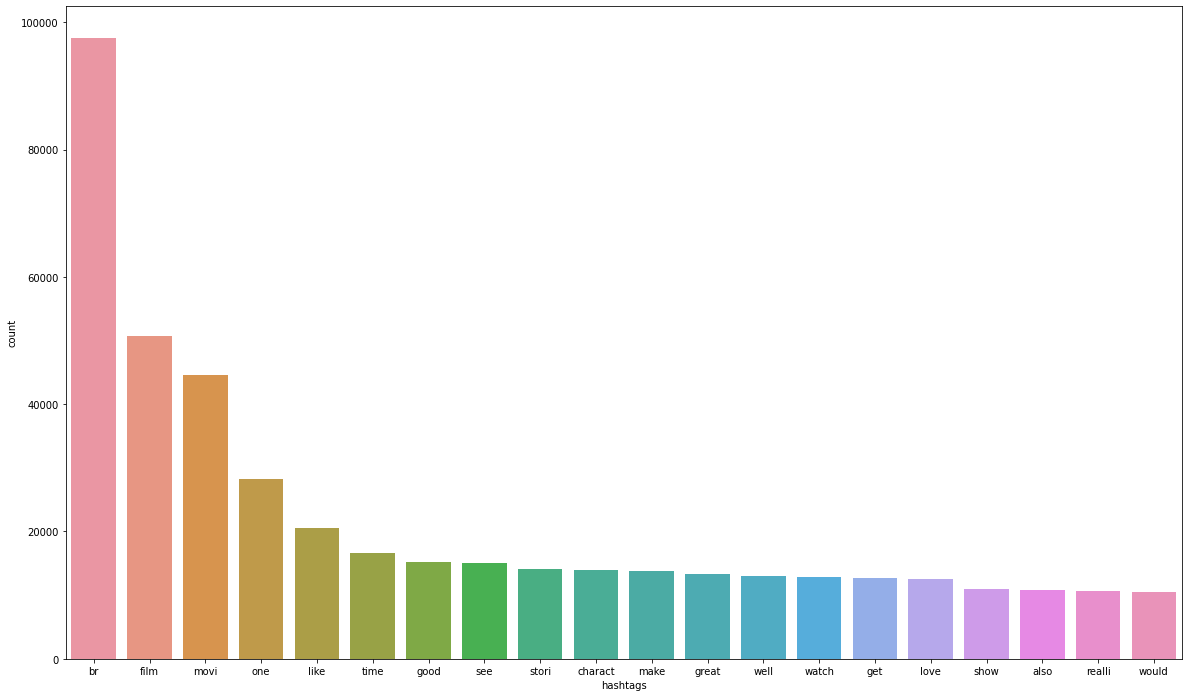

In [30]:
plt.figure(figsize=(20,12))
sns.barplot(data=top_20_positive, x='hashtags', y='count')

In [31]:
## So here we have list of positive_Words along with their counts which are used most often in tweets which are Positive in nature.

In [32]:
df_negative = tweets[tweets['sentiment']==0]

In [33]:
df_negative

,review,sentiment
3,Basically there's a family where a little boy ...,0
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
10,Phil the Alien is one of those quirky films wh...,0
11,I saw this movie when I was about 12 when it c...,0
...,...,...
49994,This is your typical junk comedy.<br /><br />T...,0
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [34]:
x_negative = df_negative['review']
y_negative = df_negative['sentiment']

In [35]:
x_negative

3        Basically there's a family where a little boy ...
7        This show was an amazing, fresh & innovative i...
8        Encouraged by the positive comments about this...
10       Phil the Alien is one of those quirky films wh...
11       I saw this movie when I was about 12 when it c...
                               ...                        
49994    This is your typical junk comedy.<br /><br />T...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 24698, dtype: object

In [36]:
y_negative

3        0
7        0
8        0
10       0
11       0
        ..
49994    0
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 24698, dtype: int64

In [37]:
negative_tweets = clean_text(x_negative)

In [38]:
negative_tweets

['basic famili littl boy jake think zombi closet parent fight time br br movi slower soap opera sudden jake decid becom rambo kill zombi br br ok first go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot br br well play parent descent dialog shot jake ignor',
 'show amaz fresh innov idea first air first year brilliant thing drop show realli funni anymor continu declin complet wast time today br br truli disgrac far show fallen write pain bad perform almost bad mild entertain respit guest host show probabl still air find hard believ creator hand select origin cast also chose band hack follow one recogn brillianc see fit replac mediocr felt must give star respect origin cast made show huge success show aw believ still air',
 'encourag posit comment film look forward watch film bad mistak seen film truli one worst aw almost everi way edit pac

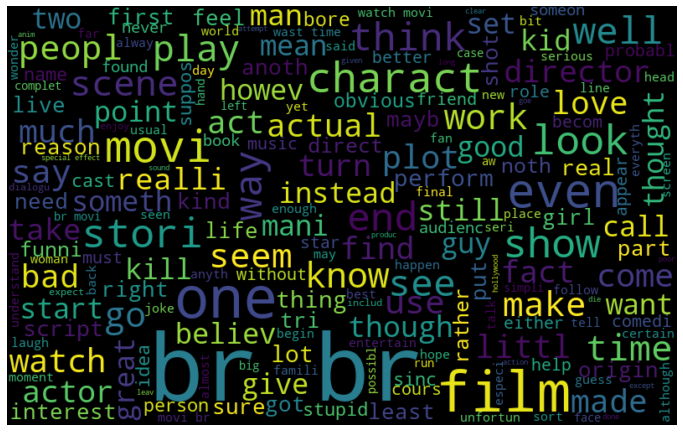

In [39]:
all_words = ' '.join([text for text in negative_tweets]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(12, 8)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [40]:
negative_words = Counter()

for i in range(len(negative_tweets)):
  for word in negative_tweets[i].split():
    negative_words[word]+=1

negative_words.most_common()    

[('br', 102824),
 ('movi', 57865),
 ('film', 44499),
 ('one', 26864),
 ('like', 24352),
 ('make', 16071),
 ('bad', 15690),
 ('even', 15288),
 ('time', 15139),
 ('get', 15111),
 ('good', 14786),
 ('watch', 14780),
 ('charact', 14162),
 ('would', 13854),
 ('see', 12923),
 ('realli', 12217),
 ('look', 11642),
 ('scene', 11277),
 ('stori', 10970),
 ('act', 10478),
 ('much', 9978),
 ('go', 9819),
 ('end', 9719),
 ('peopl', 9417),
 ('thing', 9363),
 ('could', 9185),
 ('think', 8963),
 ('made', 8708),
 ('show', 8654),
 ('well', 8601),
 ('plot', 8577),
 ('first', 8351),
 ('seem', 8268),
 ('way', 8266),
 ('say', 8243),
 ('know', 7841),
 ('tri', 7520),
 ('play', 7219),
 ('actor', 7192),
 ('want', 7115),
 ('also', 7090),
 ('better', 6667),
 ('never', 6568),
 ('seen', 6546),
 ('ever', 6517),
 ('come', 6456),
 ('two', 6296),
 ('take', 6232),
 ('work', 6196),
 ('littl', 5892),
 ('actual', 5875),
 ('noth', 5837),
 ('someth', 5825),
 ('mani', 5757),
 ('guy', 5726),
 ('love', 5688),
 ('give', 5521),
 (

In [41]:
negative_words

Counter({'basic': 1707,
         'famili': 2307,
         'littl': 5892,
         'boy': 1985,
         'jake': 106,
         'think': 8963,
         'zombi': 1558,
         'closet': 133,
         'parent': 791,
         'fight': 2054,
         'time': 15139,
         'br': 102824,
         'movi': 57865,
         'slower': 39,
         'soap': 355,
         'opera': 386,
         'sudden': 816,
         'decid': 1982,
         'becom': 2659,
         'rambo': 111,
         'kill': 4613,
         'ok': 1496,
         'first': 8351,
         'go': 9819,
         'make': 16071,
         'film': 44499,
         'must': 3015,
         'thriller': 861,
         'drama': 1125,
         'watchabl': 430,
         'divorc': 138,
         'argu': 219,
         'like': 24352,
         'real': 4266,
         'life': 4722,
         'total': 2454,
         'ruin': 706,
         'expect': 3082,
         'see': 12923,
         'boogeyman': 34,
         'similar': 877,
         'instead': 2877,
      

In [42]:
freq_df_negative = pd.DataFrame(list(negative_words.items()))
freq_df_negative.columns = ['hashtags', 'count']
top_20_negative = freq_df_negative.nlargest(columns='count', n=20)

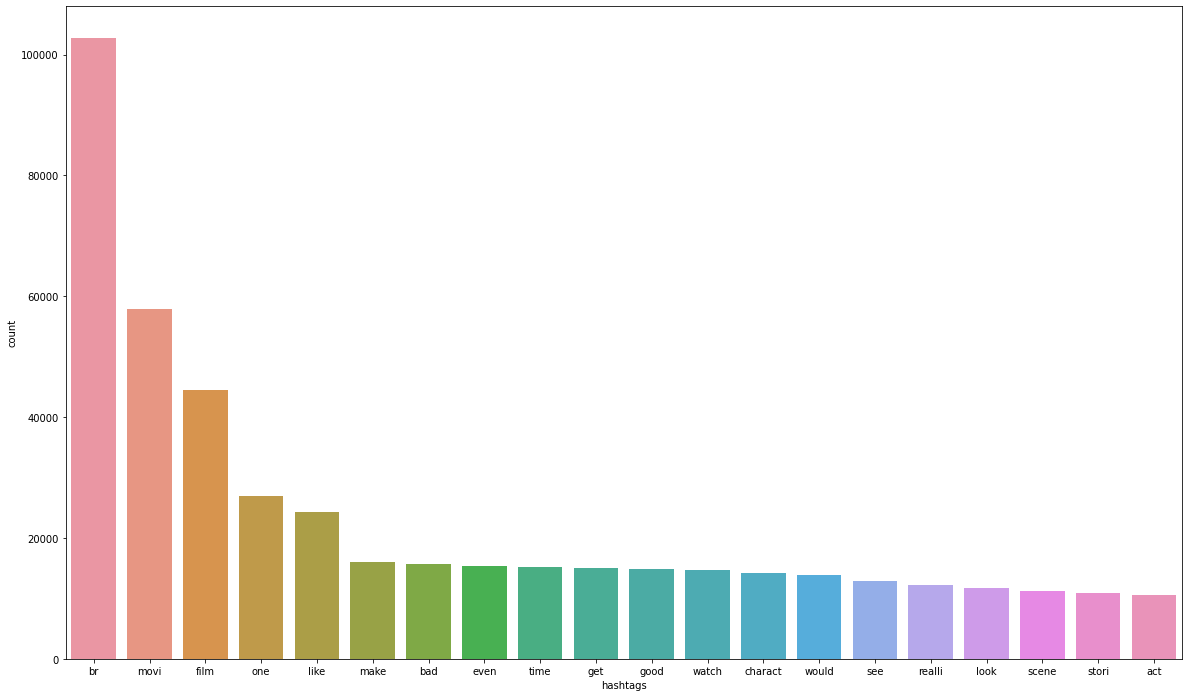

In [43]:
plt.figure(figsize=(20,12))
sns.barplot(data=top_20_negative, x='hashtags', y='count')

In [44]:
## So here we have list of Negative_Words along with their counts which are used most often in tweets which are negative in nature.